In [5]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df.head() 

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


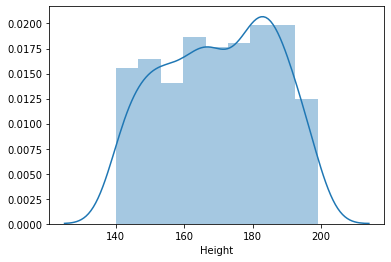

In [6]:
sns.distplot(df['Height'])

In [7]:
df.Height.mean()

169.944

In [8]:
df.Height.std() 

16.37526067959376

In [10]:
upper_limit = df.Height.mean() + 3 * df.Height.std()
upper_limit

219.06978203878128

In [11]:
lower_limit = df.Height.mean() - 3 * df.Height.std()
lower_limit

120.8182179612187

In [14]:
df[(df['Height']  > upper_limit) | (df['Height'] < lower_limit)]

,Gender,Height,Weight,Index


In [16]:
df_new = df[(df['Height'] < upper_limit) & (df['Height'] > lower_limit)]
df_new

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [17]:
df.shape, df_new.shape 

((500, 4), (500, 4))

# Using Z-Score

$$
Z = \frac{x - \mu}{\sigma}
$$

In [18]:
df['ZScore'] = (df.Height - df.Height.mean())/df.Height.std() 
df.head() 

,Gender,Height,Weight,Index,ZScore
0,Male,174,96,4,0.247691
1,Male,189,87,2,1.163707
2,Female,185,110,4,0.919436
3,Female,195,104,3,1.530113
4,Male,149,61,3,-1.279003


In [21]:
df[(df['ZScore'] < -3) | df['ZScore'] > 3]

,Gender,Height,Weight,Index,ZScore


In [22]:
df[(df['ZScore'] > -3) | df['ZScore'] < 3]

,Gender,Height,Weight,Index,ZScore
0,Male,174,96,4,0.247691
1,Male,189,87,2,1.163707
2,Female,185,110,4,0.919436
3,Female,195,104,3,1.530113
4,Male,149,61,3,-1.279003
...,...,...,...,...,...
495,Female,150,153,5,-1.217935
496,Female,184,121,4,0.858368
497,Female,141,136,5,-1.767544
498,Male,150,95,5,-1.217935
